In [1]:
# Importing the yfinance library to work with stock market data from Yahoo Finance
import yfinance as yf

In [3]:
# Downloading the stock data for NVIDIA (Ticker: NVDA)
nvda = yf.Ticker("NVDA")

In [4]:
# Displaying the stock data we just downloaded, which includes Open, High, Low, Close prices, Volume, Dividends, and Stock Splits
nvda

yfinance.Ticker object <NVDA>

In [5]:
nvda = nvda.history(period="max")
print(nvda)

                                 Open        High         Low       Close  \
Date                                                                        
1999-01-22 00:00:00-05:00    0.040125    0.044783    0.035587    0.037618   
1999-01-25 00:00:00-05:00    0.040603    0.042036    0.037618    0.041559   
1999-01-26 00:00:00-05:00    0.042036    0.042872    0.037737    0.038334   
1999-01-27 00:00:00-05:00    0.038453    0.039409    0.036303    0.038215   
1999-01-28 00:00:00-05:00    0.038215    0.038453    0.037856    0.038095   
...                               ...         ...         ...         ...   
2024-09-09 00:00:00-04:00  104.871024  106.540887  103.681131  106.460892   
2024-09-10 00:00:00-04:00  107.800776  109.390643  104.941020  108.090752   
2024-09-11 00:00:00-04:00  109.380641  117.179976  107.410808  116.900002   
2024-09-12 00:00:00-04:00  116.839996  120.790001  115.379997  119.139999   
2024-09-13 00:00:00-04:00  119.080002  119.959999  117.599998  119.099998   

In [6]:
# Getting the index (which is the date in this case) of the stock data to check the available date range
nvda.index

DatetimeIndex(['1999-01-22 00:00:00-05:00', '1999-01-25 00:00:00-05:00',
               '1999-01-26 00:00:00-05:00', '1999-01-27 00:00:00-05:00',
               '1999-01-28 00:00:00-05:00', '1999-01-29 00:00:00-05:00',
               '1999-02-01 00:00:00-05:00', '1999-02-02 00:00:00-05:00',
               '1999-02-03 00:00:00-05:00', '1999-02-04 00:00:00-05:00',
               ...
               '2024-08-30 00:00:00-04:00', '2024-09-03 00:00:00-04:00',
               '2024-09-04 00:00:00-04:00', '2024-09-05 00:00:00-04:00',
               '2024-09-06 00:00:00-04:00', '2024-09-09 00:00:00-04:00',
               '2024-09-10 00:00:00-04:00', '2024-09-11 00:00:00-04:00',
               '2024-09-12 00:00:00-04:00', '2024-09-13 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=6453, freq=None)

<Axes: xlabel='Date'>

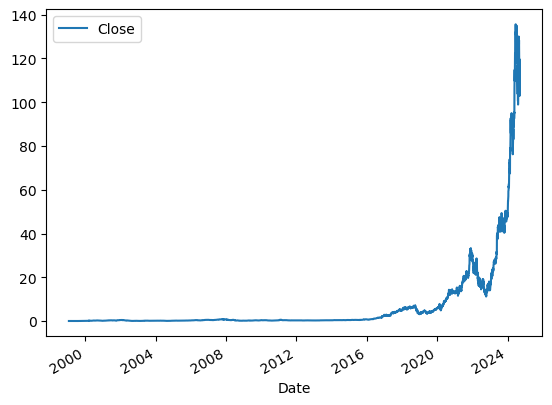

In [6]:
# Plotting a line chart of NVIDIA's closing price over time
nvda.plot.line(y="Close", use_index=True)

In [7]:
# Creating a new column "Tomorrow", which will contain the closing price of the following day
nvda["Tomorrow"] = nvda["Close"].shift(-1)
# Moves the closing price data up by one row so that each day’s closing price is paired with the closing price of the next day in the

In [8]:
# Displaying the dataset with the newly added "Tomorrow" column
nvda

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow
Date,,,,,,,,
1999-01-22 00:00:00-05:00,0.040125,0.044783,0.035587,0.037618,2714688000,0.00,0.0,0.041559
1999-01-25 00:00:00-05:00,0.040603,0.042036,0.037618,0.041559,510480000,0.00,0.0,0.038334
1999-01-26 00:00:00-05:00,0.042036,0.042872,0.037737,0.038334,343200000,0.00,0.0,0.038215
1999-01-27 00:00:00-05:00,0.038453,0.039409,0.036303,0.038215,244368000,0.00,0.0,0.038095
1999-01-28 00:00:00-05:00,0.038215,0.038453,0.037856,0.038095,227520000,0.00,0.0,0.036303
...,...,...,...,...,...,...,...,...
2024-09-09 00:00:00-04:00,104.871024,106.540887,103.681131,106.460892,273912000,0.00,0.0,108.090752
2024-09-10 00:00:00-04:00,107.800776,109.390643,104.941020,108.090752,268283700,0.00,0.0,116.900002
2024-09-11 00:00:00-04:00,109.380641,117.179976,107.410808,116.900002,441422400,0.00,0.0,119.139999


In [9]:
# Creating a new column "Target" to indicate if the stock price went up the next day
# It will have a value of 1 if the "Tomorrow" price is higher than today's close, and 0 otherwise
nvda["Target"] = (nvda["Tomorrow"] > nvda["Close"]).astype(int)
# .astype(int): Converts True (stock went up) to 1 and False (stock didn't go up) to 0.

In [11]:
# Displaying the dataset with the newly added "Target" column
nvda

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target
Date,,,,,,,,,
1999-01-22 00:00:00-05:00,0.040129,0.044786,0.035590,0.037621,2714688000,0.0,0.0,0.041562,1
1999-01-25 00:00:00-05:00,0.040607,0.042039,0.037621,0.041562,510480000,0.0,0.0,0.038337,0
1999-01-26 00:00:00-05:00,0.042039,0.042876,0.037740,0.038337,343200000,0.0,0.0,0.038218,0
1999-01-27 00:00:00-05:00,0.038457,0.039412,0.036307,0.038218,244368000,0.0,0.0,0.038098,0
1999-01-28 00:00:00-05:00,0.038218,0.038457,0.037859,0.038098,227520000,0.0,0.0,0.036307,0
...,...,...,...,...,...,...,...,...,...
2024-09-06 00:00:00-04:00,108.040001,108.150002,100.949997,102.830002,413638100,0.0,0.0,106.470001,1
2024-09-09 00:00:00-04:00,104.879997,106.550003,103.690002,106.470001,273912000,0.0,0.0,108.099998,1
2024-09-10 00:00:00-04:00,107.809998,109.400002,104.949997,108.099998,268283700,0.0,0.0,116.910004,1


In [9]:
# Limiting the dataset to only data from the year 2000 onwards and making a copy of it
nvda = nvda.loc["2000-01-01":].copy()

In [10]:
# Displaying the dataset filtered from the year 2000
nvda

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow
Date,,,,,,,,
2000-01-03 00:00:00-05:00,0.090282,0.090999,0.084311,0.089446,300912000,0.00,0.0,0.087058
2000-01-04 00:00:00-05:00,0.087893,0.088132,0.082639,0.087058,300480000,0.00,0.0,0.084191
2000-01-05 00:00:00-05:00,0.084550,0.085983,0.082997,0.084191,188352000,0.00,0.0,0.078698
2000-01-06 00:00:00-05:00,0.084191,0.084191,0.075474,0.078698,120480000,0.00,0.0,0.080012
2000-01-07 00:00:00-05:00,0.078340,0.080848,0.077146,0.080012,71184000,0.00,0.0,0.082639
...,...,...,...,...,...,...,...,...
2024-09-09 00:00:00-04:00,104.871024,106.540887,103.681131,106.460892,273912000,0.00,0.0,108.090752
2024-09-10 00:00:00-04:00,107.800776,109.390643,104.941020,108.090752,268283700,0.00,0.0,116.900002
2024-09-11 00:00:00-04:00,109.380641,117.179976,107.410808,116.900002,441422400,0.00,0.0,119.139999


In [15]:
##TESTING
# 1. Fitting the Random Forest Model

In [14]:
from sklearn.ensemble import RandomForestClassifier #ML model that uses multiple

model = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 1)
#n_estimators=100: Number of trees in the forest. 
# min_samples_split=100: Each tree splits only if it has at least 100 samples in a node to avoid overfitting

train = nvda.iloc[:-100]  # Training data: all rows except the last 100
test = nvda.iloc[-100:]   # Test data: last 100 rows

predictors = ["Close", "Volume", "Open", "High", "Low"]  # Features used for training
model.fit(train[predictors], train["Target"])  # Train the model

RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
# 2. Making Predictions and Calculating Precision

In [16]:
from sklearn.metrics import precision_score #to make predictions on the test set.
# precision_score: Precision measures the proportion of positive identifications (predictions) that were actually correct. 

predictions = model.predict(test[predictors])# Predict the test set

In [17]:
# Storing the predictions as a pandas Series using the same index as the test set
import pandas as pd
predictions = pd.Series(predictions, index = test.index)

In [19]:
# Calculate precision score: the ratio of correct positive predictions
precision_score(test["Target"], predictions)

# the precision score is 0.7, meaning 70% of the predictions where the model said "the stock will go up" were correct.

0.7

In [ ]:
# 3. Combining Target and Predictions for Visualization

In [20]:
combined = pd.concat([test["Target"], predictions], axis =1)# Combine actual and predicted values

<Axes: xlabel='Date'>

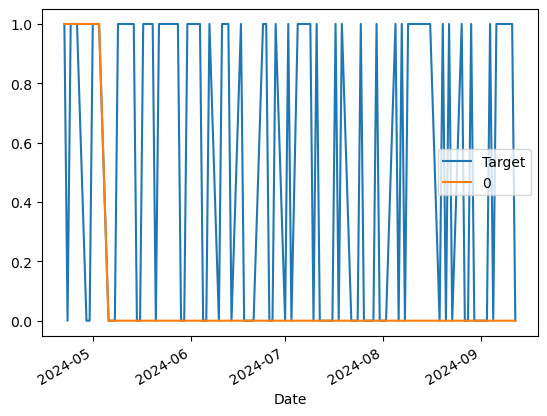

In [21]:
# Plot the data to visualize
combined.plot()

In [ ]:
# 4. Predict Function Definition

In [22]:
# This function makes the process of training, predicting, and combining the results reusable. 
# You can call it for any training and test set combination.
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])  # Train the model
    predictions = model.predict(test[predictors])  # Predict on test data
    predictions = pd.Series(predictions, index=test.index, name="Predictions")  # Store predictions
    combined = pd.concat([test["Target"], predictions], axis=1)  # Combine actual and predicted
    return combined

In [ ]:
# 5. Backtest Function Definition

In [1]:
# Start the backtest with 2500 rows of data.
# step=250: Every time, use 250 rows for testing.

def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []  # List to store all predictions

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()  # Training data from 0 to i
        test = data.iloc[i:(i+step)].copy()  # Test data in chunks
        predictions = predict(train, test, predictors, model)  # Make predictions
        all_predictions.append(predictions)  # Append predictions

    return pd.concat(all_predictions)  # Return concatenated results

In [ ]:
# 6. Backtest the Model and Get Value Counts

In [25]:
predictions = backtest(nvda, model, predictors)  # Backtest the model

# backtest: Uses the backtest function you created earlier to evaluate the model’s performance across multiple test sets.

In [26]:
predictions["Predictions"].value_counts()# Count how many times 0 or 1 was predicted
# value_counts(): Shows how many times the model predicted 0 (stock goes down) or 1 (stock goes up).

0    2050
1    1663
Name: Predictions, dtype: int64

In [ ]:
# 7. Precision Score After Backtesting

In [27]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5111244738424534

In [ ]:
# 8. Analyzing Target Distribution

In [28]:
predictions["Target"].value_counts() / predictions.shape[0]# Distribution of target values

# value_counts(): This tells us the distribution of actual Target values (how often the stock went up or down) during backtesting.
# predictions.shape[0]: Total number of predictions, used to calculate proportions.

1    0.528414
0    0.471586
Name: Target, dtype: float64

In [ ]:
#time to add predictors to try to improve our super basic model

In [ ]:
# 9. Adding More Predictors (Rolling Averages and Trends)

In [29]:
horizons = [2, 5, 60, 250, 1000]  # Different time horizons for rolling averages and trends

new_predictors = []  # Initialize an empty list for new predictors

for horizon in horizons:
    rolling_averages = nvda.rolling(horizon).mean()  # Calculate rolling averages
    
    ratio_column = f"Close Ratio_{horizon}"  # Create column name for close ratio
    nvda[ratio_column] = nvda["Close"] / rolling_averages["Close"]  # Close price ratio
    
    trend_column = f"Trend_{horizon}"  # Create column name for trend
    nvda[trend_column] = nvda.shift(1).rolling(horizon).sum()["Target"]  # Sum of Target values
    
    new_predictors += [ratio_column, trend_column]  # Append new columns to predictors


In [30]:
nvda = nvda.dropna()  # Drop rows with missing values

In [31]:
nvda

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target,Close Ratio_2,Trend_2,Close Ratio_5,Trend_5,Close Ratio_60,Trend_60,Close Ratio_250,Trend_250,Close Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,,
2003-12-26 00:00:00-05:00,0.167929,0.174808,0.167241,0.173814,363960000,0.0,0.0,0.181152,1,1.021104,1.0,1.046287,4.0,1.177283,34.0,1.291600,134.0,0.809514,483.0
2003-12-29 00:00:00-05:00,0.177101,0.181764,0.176261,0.181152,756624000,0.0,0.0,0.181535,1,1.020672,2.0,1.064690,4.0,1.219251,34.0,1.342408,135.0,0.843319,484.0
2003-12-30 00:00:00-05:00,0.179242,0.184974,0.179089,0.181535,550884000,0.0,0.0,0.177330,0,1.001055,2.0,1.042125,4.0,1.214567,34.0,1.341765,135.0,0.844717,485.0
2003-12-31 00:00:00-05:00,0.181458,0.182299,0.174426,0.177330,497268000,0.0,0.0,0.176413,0,0.988284,1.0,1.007030,3.0,1.179849,34.0,1.307471,135.0,0.824774,485.0
2004-01-02 00:00:00-05:00,0.180159,0.182604,0.176413,0.176413,436416000,0.0,0.0,0.182146,1,0.997407,0.0,0.990812,3.0,1.167532,33.0,1.297850,134.0,0.820140,484.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-05 00:00:00-04:00,104.989998,109.650002,104.760002,107.209999,306850700,0.0,0.0,102.830002,0,1.004686,1.0,0.960009,2.0,0.889732,29.0,1.341125,142.0,2.971269,538.0
2024-09-06 00:00:00-04:00,108.040001,108.150002,100.949997,102.830002,413638100,0.0,0.0,106.470001,1,0.979147,1.0,0.945789,2.0,0.855522,29.0,1.282659,142.0,2.842799,537.0
2024-09-09 00:00:00-04:00,104.879997,106.550003,103.690002,106.470001,273912000,0.0,0.0,108.099998,1,1.017391,1.0,1.003071,2.0,0.888112,29.0,1.324013,143.0,2.935801,538.0


In [ ]:
# 10. Updating the Random Forest Model

In [32]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)  # Update model
# n_estimators=200: Using more trees in the forest to capture more complexity.
# min_samples_split=50: Reducing the minimum samples required to split a node to allow the model to create more detailed splits.

In [ ]:
# 11. Predict Function with Probability Threshold

In [37]:
def predict(train, test, predictors, model): 
    model.fit(train[predictors], train["Target"])  # Fit model on training data
    predictions = model.predict_proba(test[predictors])[:,1]  # Get probability of class 1
    
# predict_proba: Returns the probability of each class (for both 0 and 1). 
# We only take the probability of class 1 (upward stock movement).
    
    predictions[predictions >= .6] = 1  # Threshold: if prob >= 0.6, predict 1
    predictions[predictions < .6] = 0   # Otherwise, predict 0

# Thresholding: If the probability of class 1 is at least 60%, predict 1. Otherwise, predict 0.

    predictions = pd.Series(predictions, index=test.index, name="Predictions")  # Create Series
    combined = pd.concat([test["Target"], predictions], axis=1)  # Combine actual and predictions
    return combined


In [ ]:
# 12. Backtest with New Predictors and Check Precision

In [38]:
predictions = backtest(nvda, model, new_predictors)# Backtest with new predictors

# backtest with new predictors: This uses the additional rolling averages and trends to improve the model.

In [39]:
predictions["Predictions"].value_counts() # Count the number of 0s and 1s predicted

0.0    2397
1.0     315
Name: Predictions, dtype: int64

In [40]:
precision_score(predictions["Target"], predictions["Predictions"])
# precision_score: Precision has improved to 57.7%, meaning that the positive predictions are becoming more accurate

0.5777777777777777